<a href="https://colab.research.google.com/github/SathyaSudha-96/Deep-Learning-2021-22/blob/main/IDL_Assignment_9_SathyaSudhaMurugan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


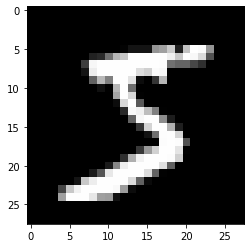

In [ ]:
plt.imshow(x_train[0], cmap="Greys_r")

In [ ]:
#Reshape the images 
x_train =  x_train.reshape([-1, 784])
x_test = x_test.reshape([-1, 784])
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


# AutoEncoder

In [ ]:
latent_dimension = 32

image_input = tf.keras.Input((784,))  # flattened 28x28 MNIST images
encoding = tf.keras.layers.Dense(latent_dimension)(image_input)
encoder = tf.keras.Model(image_input, encoding)

latent_input = tf.keras.Input((latent_dimension,))
# note: we use 784 units since we need the same number of outputs as we have inputs in the data!
# also, sigmoid activation to match our input data range [0, 1]
decoding = tf.keras.layers.Dense(784, tf.nn.sigmoid)(latent_input)
decoder = tf.keras.Model(latent_input, decoding)

autoencoder = tf.keras.Model(image_input, decoder(encoder(image_input)))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2746 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1717 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1438 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1274 - val_loss: 0.1205
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1170 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1095 - val_loss: 0.1053
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1039 - val_loss: 0.1003
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0998 - val_loss: 0.0970
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0973 - val_loss: 0.0951
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0958 - val_lo

In [ ]:
autoencoder_images = autoencoder.predict(x_test)

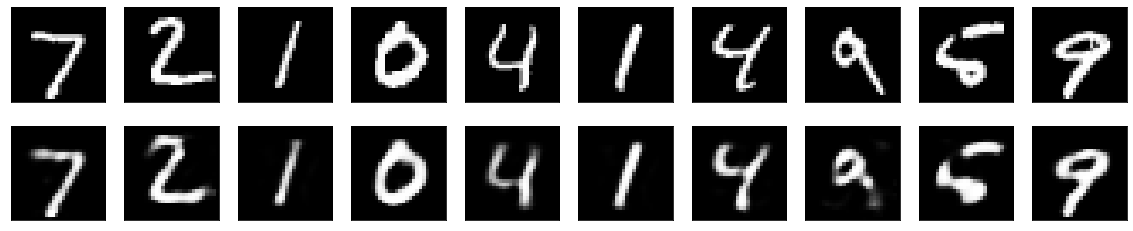

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder

In [ ]:
latent_dimension = 128
#Encoding
input_image = tf.keras.Input((784,))  # flattened 28x28 MNIST images
encoding = tf.keras.layers.Dense(latent_dimension,activation='relu')(input_image)
encoding = tf.keras.layers.Dense(int(latent_dimension/2),activation='relu')(encoding)
encoding = tf.keras.layers.Dense(int(latent_dimension/2),activation='relu')(encoding)
encoding = tf.keras.layers.Dense(int(latent_dimension/2),activation='relu')(encoding)
encoding = tf.keras.layers.Dense(int(latent_dimension/2),activation='relu')(encoding)
encoder = tf.keras.Model(input_image, encoding)
#Decoding
decoding = tf.keras.layers.Dense(784, activation='sigmoid')(encoding)

#Deep Autoencoder
Deep_Autoencoder = tf.keras.Model(input_image,decoding)

#This is the size of our encoded representations
latent_input = tf.keras.Input((int(latent_dimension/2),))
# retrieve the last layer of the autoencoder model
decoder_layer = Deep_Autoencoder.layers[-1]
# create the decoder model
decoder = tf.keras.Model(latent_input, decoder_layer(latent_input))
# note: we use 784 units since we need the same number of outputs as we have inputs in the data!
# also, sigmoid activation to match our input data range [0, 1]
Deep_Autoencoder.summary()

In [ ]:
Deep_Autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
Deep_Autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2656 - val_loss: 0.1849
Epoch 2/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1601 - val_loss: 0.1438
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1400 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1294 - val_loss: 0.1233
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1204 - val_loss: 0.1152
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1141 - val_loss: 0.1102
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1099 - val_loss: 0.1070
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1072 - val_loss: 0.1050
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1053 - val_loss: 0.1033
Epoch 10/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1036 - val_lo

In [ ]:
deep_autoencoded_images = Deep_Autoencoder.predict(x_test)

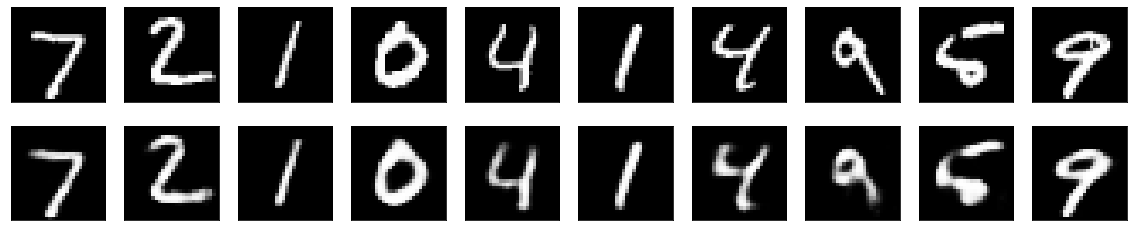

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(deep_autoencoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolution Autoencoder

In [ ]:
#Now lets not reshape the images
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))  

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convolution_autoencoder = tf.keras.Model(input_img, decoded)
convolution_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
convolution_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
convolution_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 76s 322ms/step - loss: 0.2933 - val_loss: 0.1686
Epoch 2/50
235/235 [==============================] - 72s 307ms/step - loss: 0.1546 - val_loss: 0.1441
Epoch 3/50
235/235 [==============================] - 73s 310ms/step - loss: 0.1402 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 70s 298ms/step - loss: 0.1323 - val_loss: 0.1280
Epoch 5/50
235/235 [==============================] - 70s 297ms/step - loss: 0.1265 - val_loss: 0.1231
Epoch 6/50
235/235 [==============================] - 70s 299ms/step - loss: 0.1224 - val_loss: 0.1197
Epoch 7/50
235/235 [==============================] - 70s 297ms/step - loss: 0.1194 - val_loss: 0.1175
Epoch 8/50
235/235 [==============================] - 70s 297ms/step - loss: 0.1169 - val_loss: 0.1145
Epoch 9/50
235/235 [==============================] - 70s 299ms/step - loss: 0.1145 - val_loss: 0.1122
Epoch 10/50
235/235 [==============================] - 72s 307ms/step - l

In [ ]:
convolution_autoencoder_images = convolution_autoencoder.predict(x_test)

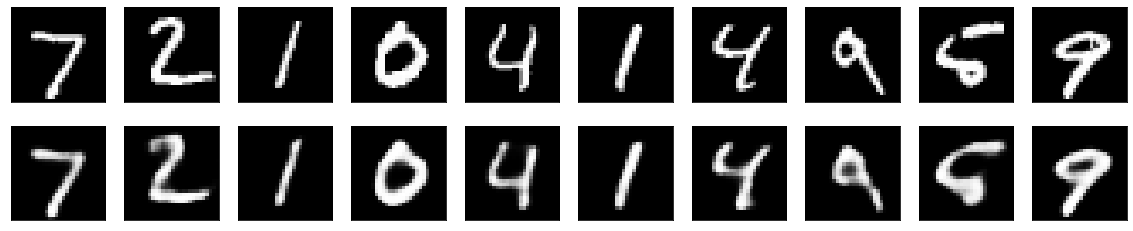

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(convolution_autoencoder_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Denoising

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))  

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoising_convolution_autoencoder = tf.keras.Model(input_img, decoded)

denoising_convolution_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_convolution_autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 7s 20ms/step - loss: 0.2977 - val_loss: 0.2102
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1954 - val_loss: 0.1832
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1786 - val_loss: 0.1725
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1703 - val_loss: 0.1660
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1643 - val_loss: 0.1602
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1595 - val_loss: 0.1581
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1556 - val_loss: 0.1523
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1524 - val_loss: 0.1522
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1499 - val_loss: 0.1470
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1477 - val_lo

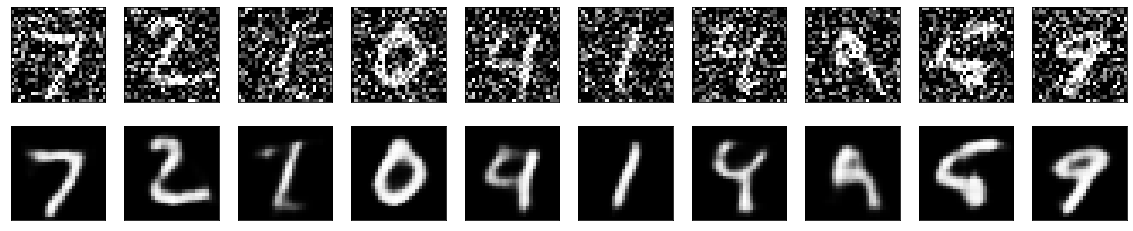

In [ ]:
denoising_convolution_autoencoder_images = denoising_convolution_autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoising_convolution_autoencoder_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# no pre-training

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#Reshape the images 
x_train =  x_train.reshape([-1, 784])
x_test = x_test.reshape([-1, 784])

In [6]:
y_train.shape

(60000, 10)

In [9]:
latent_dimension = 10
num_classes = y_train.shape[1]
image_input = tf.keras.Input((784,))  # flattened 28x28 MNIST images
encoding = tf.keras.layers.Dense(latent_dimension, activation='relu')(image_input)
#lets add a classifier on encoder
logits = tf.keras.layers.Dense(num_classes,activation='softmax')(encoding)
# classifier = tf.keras.Model(image_input, logits)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoding)
classifier_autoencoder = tf.keras.Model(image_input, logits)
classifier_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
classifier_autoencoder.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True)

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.3134
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1372
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1044
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0907
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0833
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0786
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0752
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0727
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0705
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0662
Epoch 11/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0628
Epoch 12/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0607
Epoch 13/50
235/235 [====